In [1]:
pip install gradio

  Using cached gradio-3.24.1-py3-none-any.whl (15.7 MB)
  Using cached gradio_client-0.0.8-py3-none-any.whl (20 kB)
  Using cached mdit_py_plugins-0.3.3-py3-none-any.whl (50 kB)
  Using cached huggingface_hub-0.13.4-py3-none-any.whl (200 kB)
  Using cached uvicorn-0.21.1-py3-none-any.whl (57 kB)
  Using cached httpx-0.23.3-py3-none-any.whl (71 kB)
  Using cached aiofiles-23.1.0-py3-none-any.whl (14 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached ffmpy-0.3.0.tar.gz (4.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 124.5/124.5 kB 281.4 kB/s eta 0:00:00
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
     ------------------------------------ 197.1/197.1 kB 411.7 kB/s eta 0:00:00
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached python_multipart-0.0.6-py3-none-an


[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: E:\python9\python.exe -m pip install --upgrade pip


In [8]:
!pip install --user fastai


  Using cached fastai-2.7.12-py3-none-any.whl (233 kB)
  Using cached fastdownload-0.0.7-py3-none-any.whl (12 kB)
  Using cached fastcore-1.5.29-py3-none-any.whl (67 kB)
  Using cached torchvision-0.15.1-cp311-cp311-win_amd64.whl (1.2 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached pandas-2.0.0-cp311-cp311-win_amd64.whl (11.2 MB)
  Using cached fastprogress-1.0.3-py3-none-any.whl (12 kB)
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached spacy-3.5.1-cp311-cp311-win_amd64.whl (12.2 MB)
  Using cached torch-2.0.0-cp311-cp311-win_amd64.whl (172.3 MB)
  Using cached murmurhash-1.0.9-cp311-cp311-win_amd64.whl (18 kB)
  Using cached preshed-3.0.8-cp311-cp311-win_amd64.whl (91 kB)
  Using cached thinc-8.1.9-cp311-cp311-win_amd64.whl (1.5 MB)
  Using cached srsly-2.4.6-cp311-cp311-win_amd64.whl (478 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
#|default_exp app


In [25]:
#|export
from fastai.vision.all import *

import gradio as gr


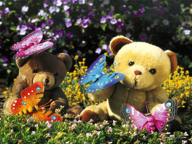

In [26]:
im = PILImage.create('teddy.jpg') 
im.thumbnail((192,192))

im

In [27]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [28]:
#|export
model=load_learner('model.pkl')

In [29]:

model.predict(im)

('teddy', tensor(2), tensor([7.6904e-04, 4.3177e-05, 9.9919e-01]))

In [30]:
#|export
categories = ('black', 'grizzly','teddy')

def classify_image(img):
  pred, idx, probs = model.predict(img) 
  return dict(zip(categories, map (float,probs)))

In [31]:
classify_image(im)

{'black': 0.0007690350757911801,
 'grizzly': 4.317671846365556e-05,
 'teddy': 0.9991877675056458}

In [36]:
#|export

image= gr.inputs.Image(shape=(192, 192)) 
label= gr.outputs.Label() 
examples =['black.jpg',  'teddy.jpg']

intf= gr.Interface(fn =classify_image, inputs= image, outputs= label, Examples= examples) 
intf.launch(inline=False, share=True, debug=True)

E:\python9\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
E:\python9\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
E:\python9\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
E:\python9\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
E:\python9\lib\site-packages\gradio\deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'Examples': ['black.jpg', 'teddy.jpg']}
  warnings.warn(


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0afde658547610ed71.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0afde658547610ed71.gradio.live


     -------------------------------------- 64.8/64.8 kB 291.7 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 82.0/82.0 kB 417.4 kB/s eta 0:00:00
     ---------------------------------------- 58.1/58.1 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 64.5/64.5 kB 348.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.0.1
[notice] To update, run: E:\python9\python.exe -m pip install --upgrade pip


In [37]:
import nbdev
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successful')

Export successful
